
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

## The Data

**Download the fashion mnist dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
X_train.shape # check the shape of the image

(60000, 28, 28)

In [5]:
y_train.shape # check the shape of the label

(60000,)

## Visualizing the Data

**Using matplotlib show an any image from the data set.**

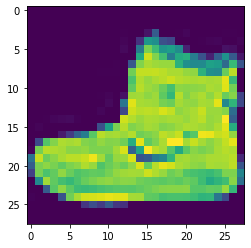

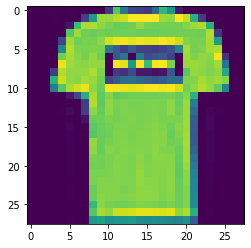

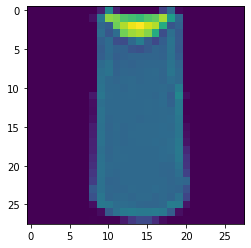

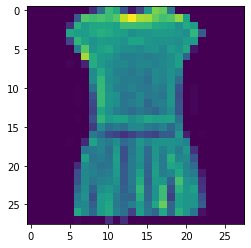

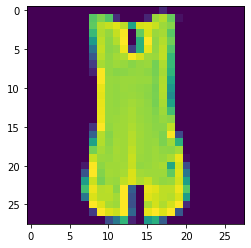

In [6]:
for i in range(5):                    
    plt.imshow(X_train[i])
    plt.show()

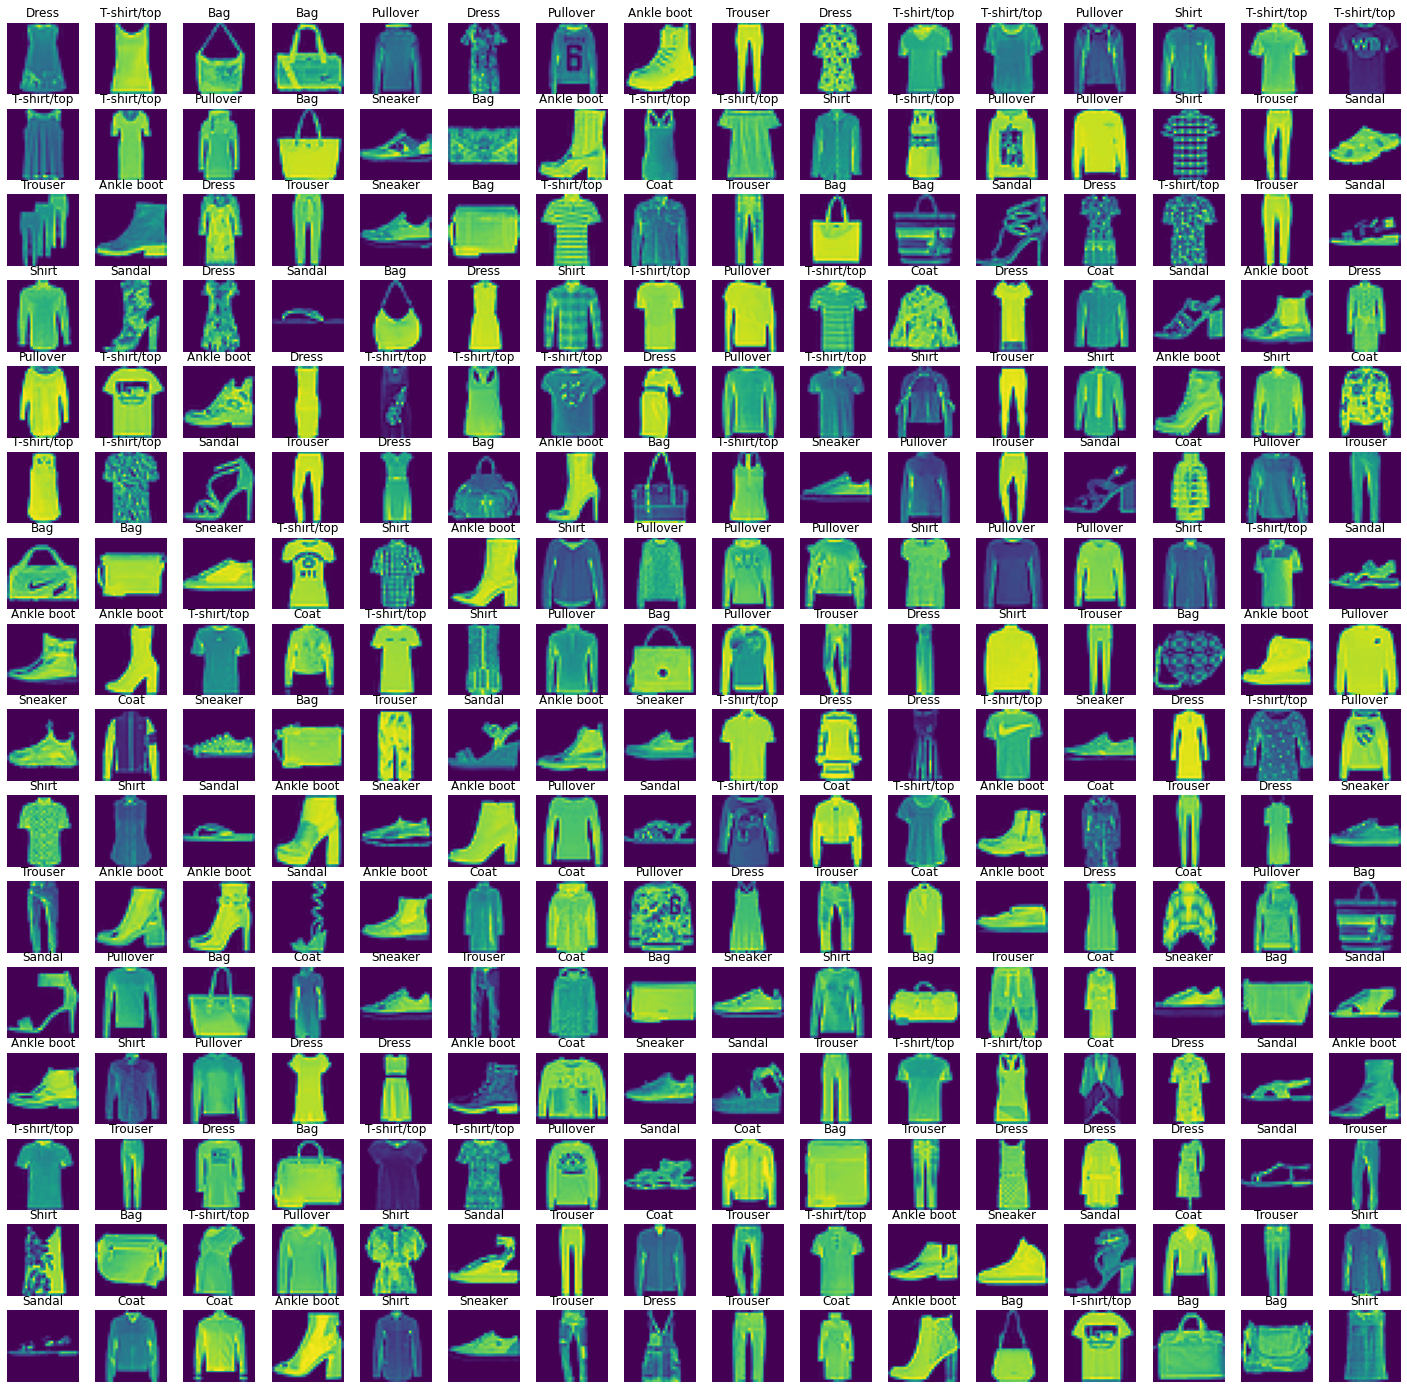

In [7]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

int(np.random.randint(low=0, high=60000, size=1))
X_train[int(np.random.randint(low=0, high=60000, size=1))]

plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(16, 16, i+1, label=classes[int(y_train[rand_index])])
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])  

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [8]:
X_train[55].min()
     

0

In [9]:
X_train[55].max() 

255

In [10]:
X_train = X_train / 255.0     # normalize the data
X_test = X_test / 255.0  

In [11]:
X_train[55].min()

0.0

In [12]:
X_train[55].max()

1.0

**Reshape the X into 4 dimension**

In [13]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)  # reshape the data
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [14]:
X_train.shape, X_test.shape # check the shape of the image

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [18]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 20412)             0         
                                                                 
 dense (Dense)               (None, 256)               5225728   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                        

###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [20]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.4395 - accuracy: 0.8468 - val_loss: 0.3068 - val_accuracy: 0.8867
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2914 - accuracy: 0.8963 - val_loss: 0.2777 - val_accuracy: 0.8960
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2474 - accuracy: 0.9100 - val_loss: 0.2567 - val_accuracy: 0.9066
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2170 - accuracy: 0.9211 - val_loss: 0.2421 - val_accuracy: 0.9128
Epoch 5/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1854 - accuracy: 0.9325 - val_loss: 0.2462 - val_accuracy: 0.9151
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1643 - accuracy: 0.9400 - val_loss: 0.2577 - val_accuracy: 0.9154
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1450 - accuracy: 0.9460 - val_loss: 0.2707 -

**Plot values of metrics you used in your model.**

In [21]:
summary= pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.439461,0.846750,0.306803,0.8867
1,0.291377,0.896267,0.277678,0.8960
2,0.247392,0.909983,0.256669,0.9066
3,0.217030,0.921050,0.242095,0.9128
4,0.185418,0.932500,0.246175,0.9151


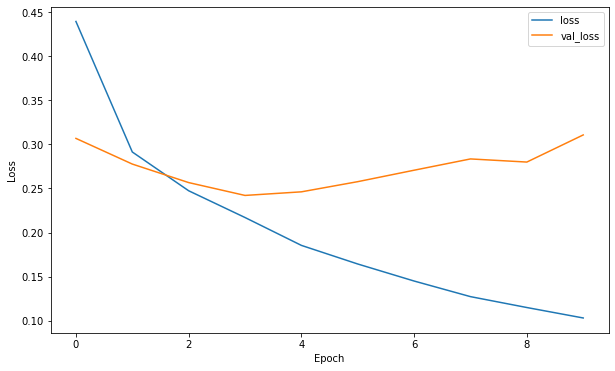

In [22]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

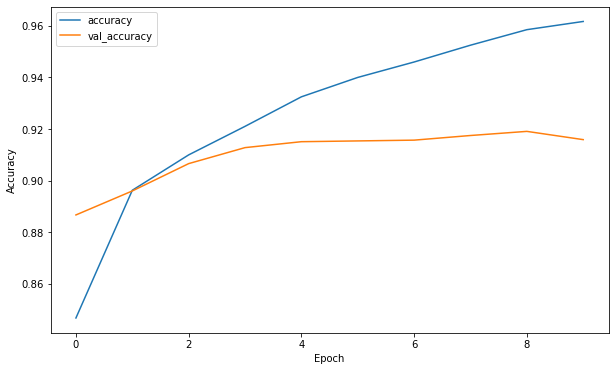

In [23]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

**Train the model using earlystop.**

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [26]:
model.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/25
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0944 - accuracy: 0.9655 - val_loss: 0.3071 - val_accuracy: 0.9199
Epoch 2/25
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0851 - accuracy: 0.9686 - val_loss: 0.3371 - val_accuracy: 0.9148
Epoch 3/25
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0780 - accuracy: 0.9706 - val_loss: 0.3692 - val_accuracy: 0.9107
Epoch 4/25
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0735 - accuracy: 0.9733 - val_loss: 0.3686 - val_accuracy: 0.9159
Epoch 5/25
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0679 - accuracy: 0.9757 - val_loss: 0.3595 - val_accuracy: 0.9186
Epoch 6/25
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0617 - accuracy: 0.9774 - val_loss: 0.4020 - val_accuracy: 0.9168


**Plot values of metrics you used in your model.**

In [27]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.094409,0.965517,0.307054,0.9199
1,0.085150,0.968550,0.337106,0.9148
2,0.078045,0.970567,0.369168,0.9107
3,0.073478,0.973350,0.368575,0.9159
4,0.067893,0.975733,0.359460,0.9186


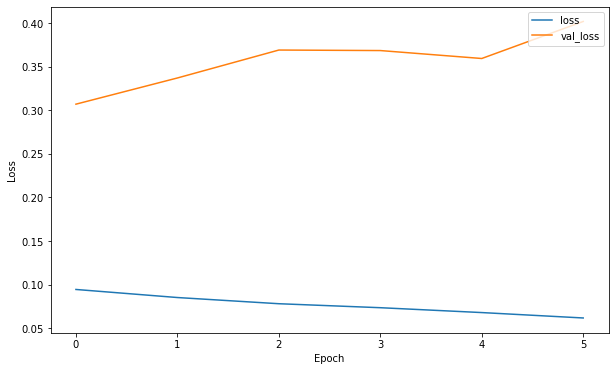

In [28]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

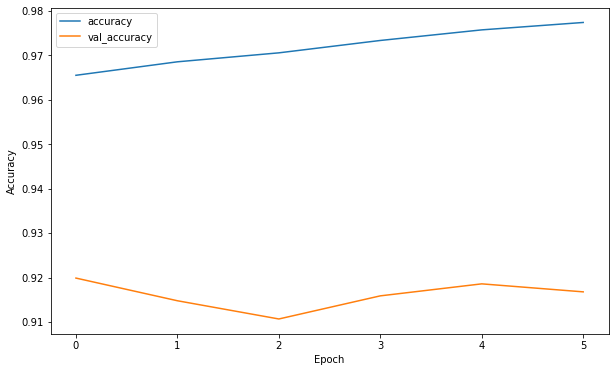

In [29]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [30]:
model.metrics_names

['loss', 'accuracy']

In [31]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.4020 - accuracy: 0.9168


[0.401958167552948, 0.9168000221252441]

In [32]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [34]:
preds = model.predict(X_test)
predictions = np.argmax(y_test, axis=1)

In [35]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(preds,axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, y_pred))

Confusion Matrix
[[843   0  11  19   1   0 122   0   4   0]
 [  0 985   2   8   2   0   2   0   1   0]
 [ 16   1 805   9  83   0  86   0   0   0]
 [  9   7   4 943  18   0  18   0   1   0]
 [  0   1  25  27 888   0  59   0   0   0]
 [  0   0   0   0   0 972   0  22   0   6]
 [ 74   0  26  30  58   0 805   0   7   0]
 [  0   0   1   0   0   2   0 972   2  23]
 [  1   2   1   4   1   2   4   2 983   0]
 [  0   0   0   0   0   4   1  23   0 972]]


In [36]:
print(classification_report(y_test_arg, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.92      0.81      0.86      1000
           3       0.91      0.94      0.92      1000
           4       0.84      0.89      0.87      1000
           5       0.99      0.97      0.98      1000
           6       0.73      0.81      0.77      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# Prediction

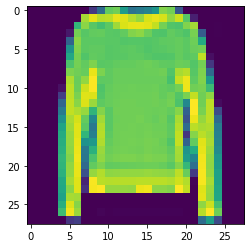

In [37]:
plt.imshow(X_test[99])

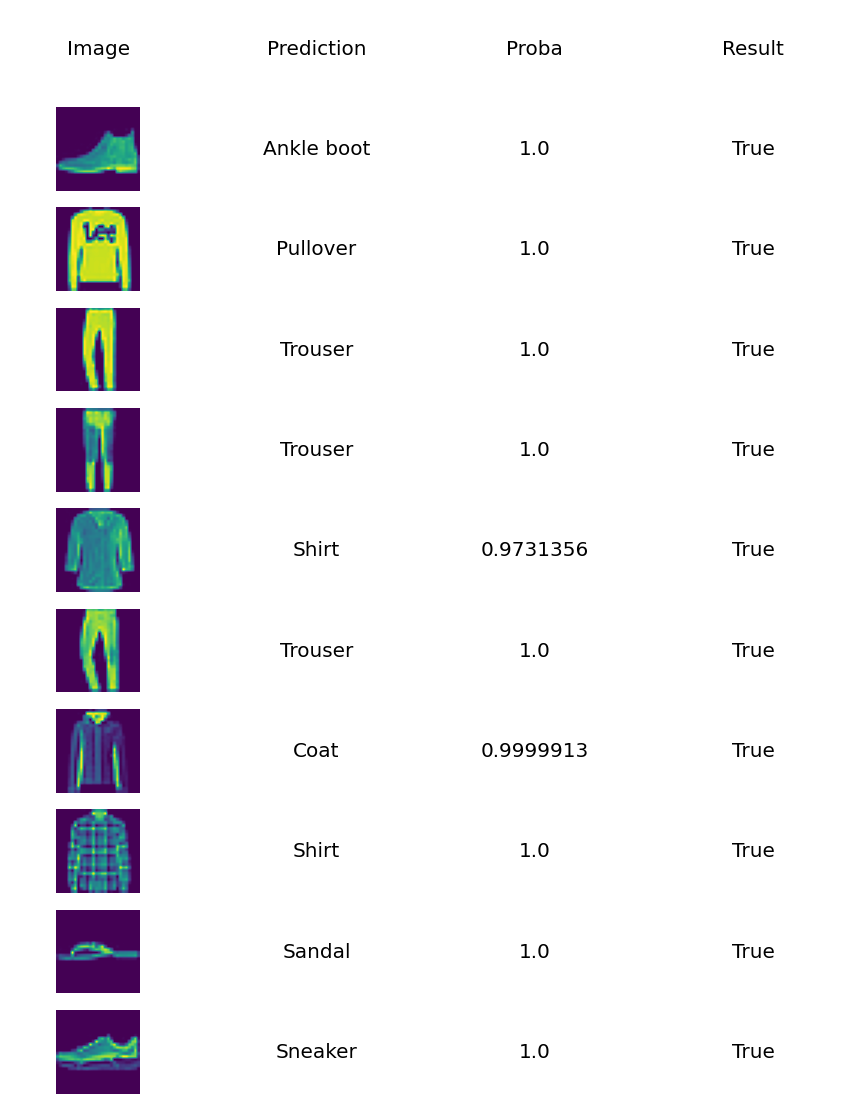

In [38]:
predictions = model.predict(X_test)

text_size = 20

plt.figure(figsize=(15,20))
plt.subplot(11, 4, 1)
plt.axis('off')
plt.text(0.5, 0.5, "Image", size=text_size, ha='center', va='center')

plt.subplot(11, 4, 2)
plt.axis('off')
plt.text(0.5, 0.5, "Prediction", size=text_size, ha='center', va='center')

plt.subplot(11, 4, 3)
plt.axis('off')
plt.text(0.5, 0.5, "Proba", size=text_size, ha='center', va='center')

plt.subplot(11, 4, 4)
plt.axis('off')
plt.text(0.5, 0.5, "Result", size=text_size, ha='center', va='center')

for i in range(10):
    predicted = predictions[i].argmax()
    actual = y_test[i].argmax()
    
    plt.subplot(11, 4, i*4 + 5)
    plt.axis('off')
    plt.imshow(X_test[i], cmap=None)
    
    plt.subplot(11, 4, i*4 + 6)
    plt.axis('off')
    plt.text(0.5, 0.5, classes[predicted], size=text_size, ha='center', va='center')
    
    plt.subplot(11, 4, i*4 + 7)
    plt.axis('off')
    plt.text(0.5, 0.5, str(predictions[i][predicted]), size=text_size, ha='center', va='center')
    
    plt.subplot(11, 4, i*4 + 8)
    plt.axis('off')
    plt.text(0.5, 0.5, str(actual == predicted), size=text_size, ha='center', va='center')
# show the figure
plt.show()

# End of Assignment

In [39]:
model.save("image_classification.h5")